# Ploynomial Regression

# 1. Extract data

In [2]:
import pandas as pd
data=pd.read_csv("C:\\Users\\KIIT\\Desktop\\ML Practice\\Dataset\\Machine Learning A-Z (Codes and Datasets)\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Python\\Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# 2. EDA

In [3]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# 3. Feature Extraction

In [6]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [7]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# 5. Build model

In [9]:
# Train data
from sklearn.preprocessing import PolynomialFeatures
polyReg=PolynomialFeatures(degree=4)
x_poly=polyReg.fit_transform(x)

In [10]:
# Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (8, 1)
y_train shape :  (8,)
x_test shape :  (2, 1)
y_test shape :  (2,)


In [11]:
# Train whole dataset
from sklearn.linear_model import LinearRegression
lnrModel=LinearRegression()
lnrModel.fit(x,y)

LinearRegression()

In [12]:
# Test 
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
train_acc=lnrModel.score(x_train,y_train)
test_acc=lnrModel.score(x_test,y_test)
y_pred=lnrModel.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Training score : ",train_acc)
print("Testing score : ",test_acc)
print("mae : ",mae)
print("mse : ",mse)
print("rmse : ",rmse)

Training score :  0.624399196310701
Testing score :  0.987371972922311
mae :  22636.36363636359
mse :  611196510.5601456
rmse :  24722.388852215427


# 6. Visualizing Results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


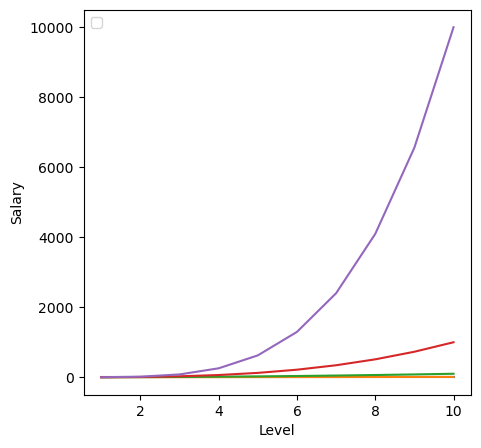

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
plt.xlabel("Level")
plt.ylabel("Salary")
#plt.scatter(x_test,y_test,label="Tested",marker="x")
#plt.plot(x_test,y_test,label="Tested")
#plt.plot(x_test,y_pred,label="Predicted")
plt.plot(x,x_poly)
plt.legend()
plt.show()